# ROC & AUC 통한 모델 비교 #

## 1. import libraries & Create Data ##

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, average_precision_score, roc_auc_score
import seaborn as sns

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC

## 2. Create Data ##

In [8]:
x_data = [
    [2, 1],
    [5, 5],
    [1, 3],
    [-1, -5],
    [3, -2],
    [4, 6],
    [-2, 3],
    [0, 0],
    [-7, -8],
    [8, 6],
    [6, 5],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
]
y_data = [1,0,1,1,0,0,0,1,0,0,0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]

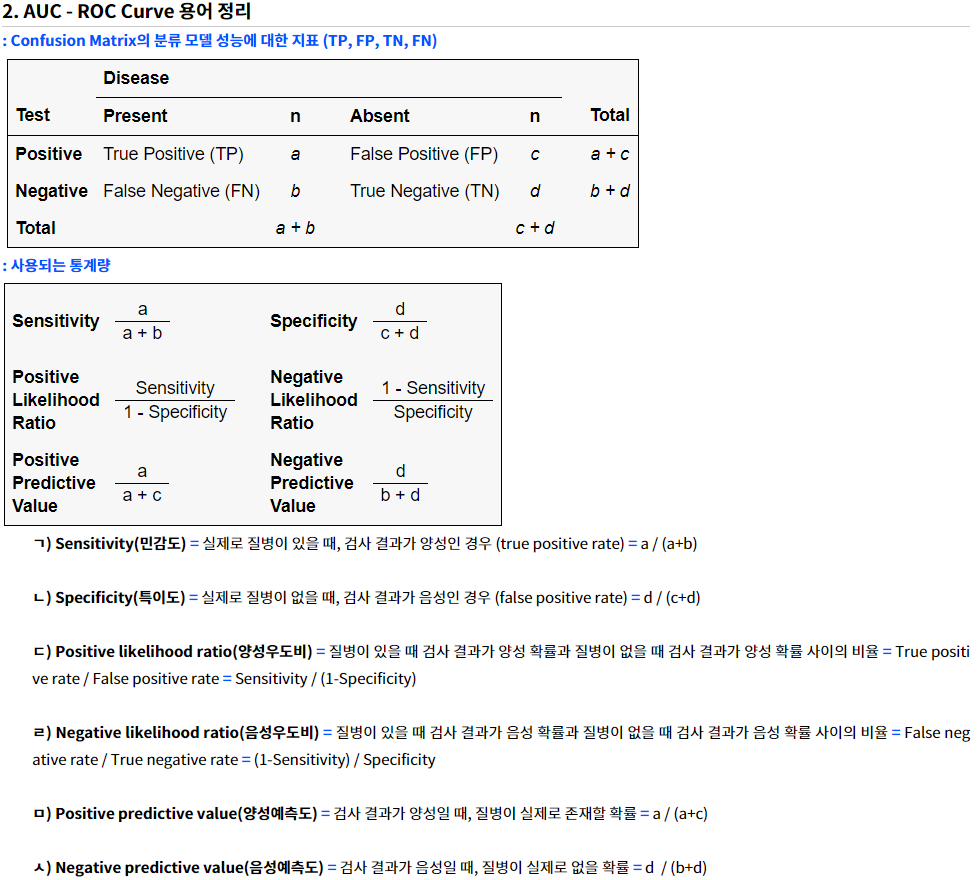

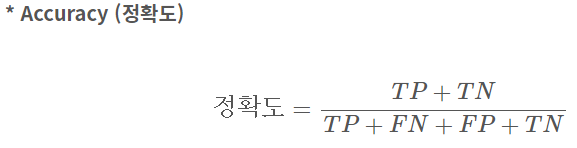

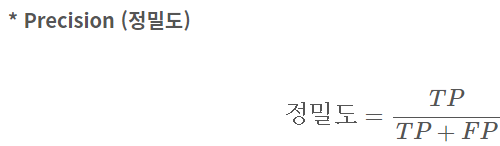

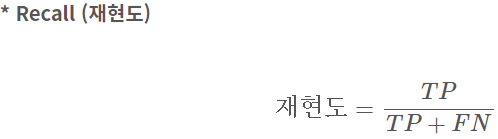

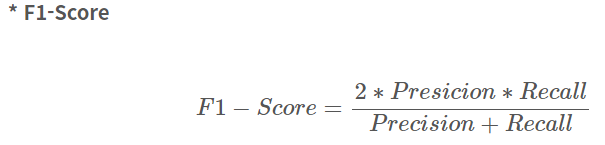

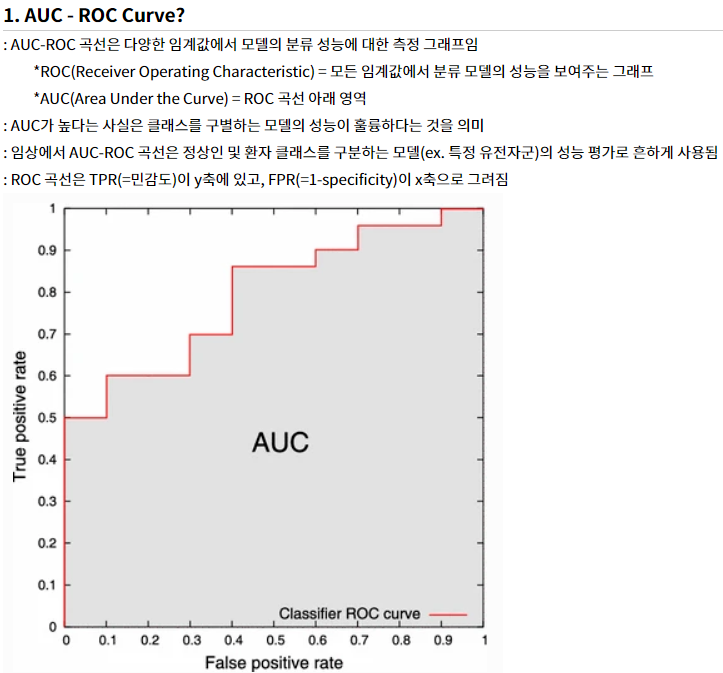

## 3. Build model ##

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777, stratify=y_data)

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(x_test))

In [18]:
print(model.decision_function(x_test))
print(y_predict)
print(false_positive_rate)
print("thresholds :", thresholds)

[-3.56925689 -1.14309993  2.09788456 -1.63016389  0.31809193 -2.44499141
 -1.78030145]
[0 0 1 0 1 0 0]
[0.         0.         0.66666667 0.66666667 1.         1.        ]
thresholds : [ 3.09788456  2.09788456 -1.14309993 -1.63016389 -1.78030145 -3.56925689]


## 4. Calculate roc_auc & Visualize ##

In [20]:
roc_auc = metrics.roc_auc_score(y_test, model.decision_function(x_test))
roc_auc

0.33333333333333337

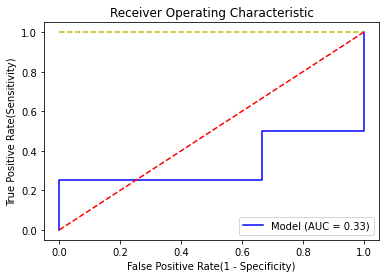

In [21]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.show()

[[2 1]
 [3 1]]
f1 score : 0.3333333333333333


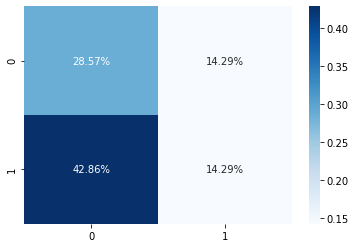

In [28]:
cf_matrix = confusion_matrix(y_test,y_predict)
print(cf_matrix)
# labels = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

f1 = f1_score(y_test, y_predict)
print('f1 score :', f1)

## 5. Grid Search parameters ##

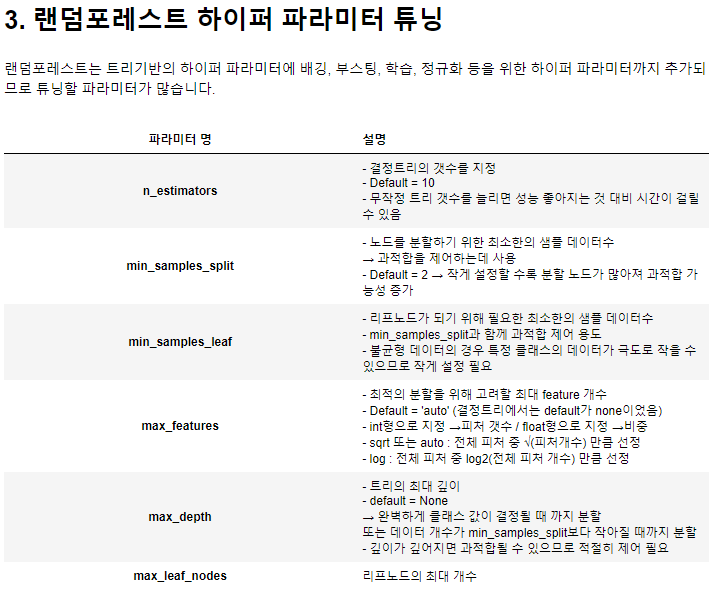

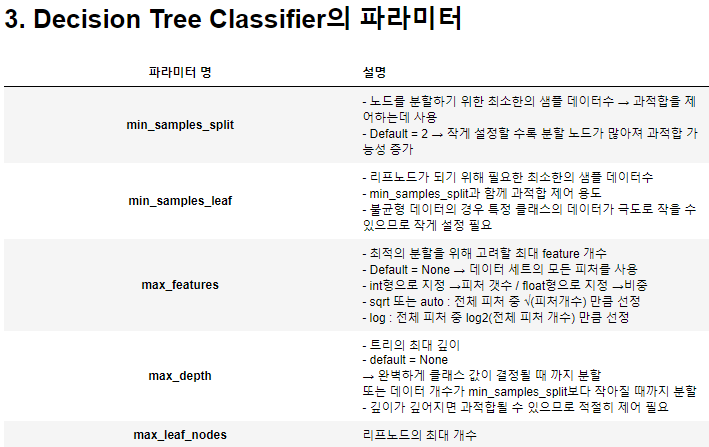

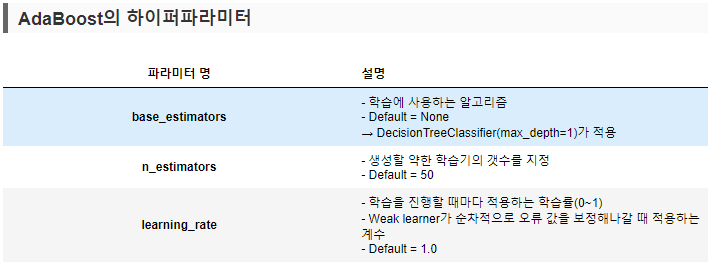

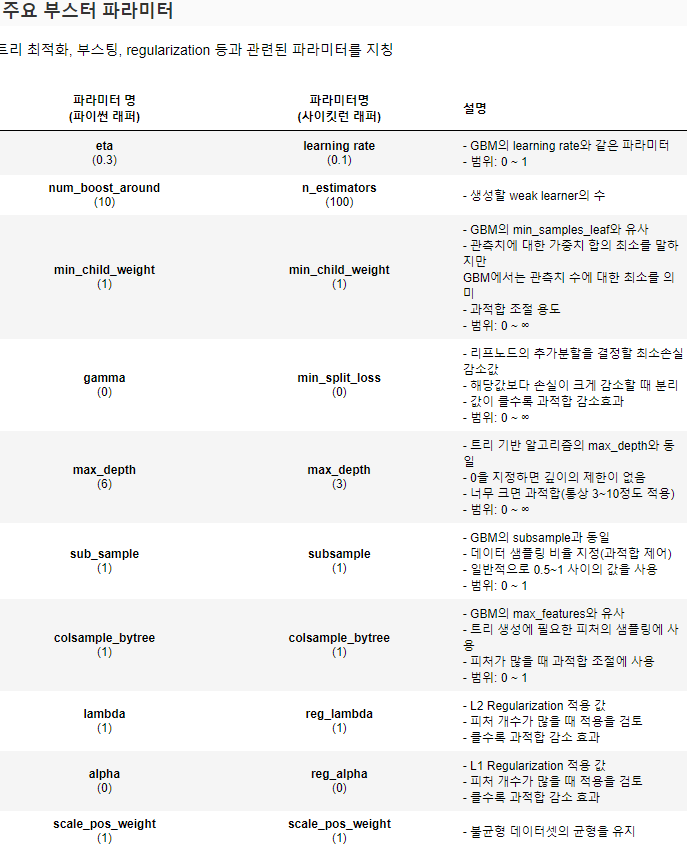

## 6. print ruc/auc/f1 score using grid search ##
## By 은규님 Code ##

In [83]:
# read data and delete na
train_df = pd.read_csv('cls_train.csv')
train_df.OC = train_df.OC.astype(str).str.replace(' ','')
print(train_df.OC.value_counts())
train_df.openDate = train_df.openDate.astype(float)
train_df = train_df.dropna().reset_index()

open     286
close     15
Name: OC, dtype: int64


In [84]:
# categorical variables into one-hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoded_x = None
for i in train_df.select_dtypes(include = ['object']).columns:
  le = LabelEncoder()
  if i == 'OC':
    train_df.OC = le.fit_transform(train_df.OC)
  else:
    feature = le.fit_transform(train_df[i])
    feature = feature.reshape(train_df.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
      encoded_x = pd.DataFrame(feature)
    else:
      encoded_x = pd.concat((encoded_x, pd.DataFrame(feature)), axis=1)
    
col = []
for i in range(3):
  col.extend(train_df[train_df.select_dtypes(
      include = ['object']).columns].iloc[:,i].unique())

encoded_x.columns = col

final_train = pd.concat((train_df.drop(columns = train_df.select_dtypes(
    include = ['object']).columns), encoded_x), axis = 1).iloc[:,1:]

# drop inst_id
final_train = final_train.drop('inst_id',axis=1)

In [86]:
print(final_train)
print(final_train.OC.value_counts())

     OC  sgg    openDate  bedCount      revenue1    salescost1          sga1  \
0     1   73  20071228.0     175.0  4.217530e+09  0.000000e+00  3.961135e+09   
1     1   89  20161228.0     468.0  1.004522e+09  5.154837e+08  4.472197e+08   
2     1  141  20000814.0     353.0  7.250734e+10  0.000000e+00  7.067740e+10   
3     1   32  20050901.0     196.0  4.904354e+10  0.000000e+00  4.765605e+10   
4     1  155  20020501.0     243.0  3.358054e+10  9.222997e+09  2.372791e+10   
..   ..  ...         ...       ...           ...           ...           ...   
272   1  169  20020401.0     306.0  1.000000e+11  2.647023e+10  6.427413e+10   
273   1  170  20120312.0     109.0  4.303270e+09  2.423876e+08  3.455912e+09   
274   1  174  20101104.0     367.0  1.207963e+10  5.309241e+08  9.521440e+09   
275   1  177  20110523.0       0.0  5.500472e+09  0.000000e+00  4.883855e+09   
276   1  178  20050211.0     214.0  7.614697e+09  4.153475e+08  5.903119e+09   

          salary1          noi1        

In [87]:
oc_list = final_train[final_train['OC']==1].index.values.tolist()
import random
oc_list_1 = random.sample(oc_list, 230)
final_train1 = final_train.copy()
final_train1["OC"][oc_list_1] = 0
print(final_train1.OC.value_counts())

0    237
1     40
Name: OC, dtype: int64


<ipython-input-87-8a7a6c38d927>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train1["OC"][oc_list_1] = 0


In [90]:
y = final_train1['OC']
X = final_train1[final_train1.columns.difference(['OC'])]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 78) (70, 78) (207,) (70,)


In [103]:
X_train

,NCLiabilities1,NCLiabilities2,OnonCAsset1,OnonCAsset2,bedCount,busan,change,choongbuk,choongnam,clinic,...,sgg,shortLoan1,shortLoan2,surplus1,surplus2,tanAsset1,tanAsset2,traditional_clinic,traditional_hospital,ulsan
147,5.042600e+09,3.280000e+09,9943000.0,5000000.0,18.0,0.0,1.0,0.0,0.0,0.0,...,126,2.558064e+08,0.000000e+00,0.000000e+00,0.000000e+00,9.668789e+09,6.926263e+09,1.0,0.0,0.0
240,1.980000e+09,1.890000e+09,24200000.0,37696000.0,143.0,0.0,1.0,0.0,0.0,1.0,...,94,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.861961e+09,3.731984e+09,0.0,0.0,0.0
68,0.000000e+00,0.000000e+00,0.0,0.0,162.0,0.0,1.0,0.0,0.0,1.0,...,139,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
51,6.452164e+08,3.305637e+08,474058660.0,134383260.0,181.0,0.0,1.0,0.0,0.0,0.0,...,40,3.396784e+09,3.858445e+09,2.791113e+09,2.126931e+09,8.435944e+09,8.722359e+09,1.0,0.0,0.0
170,2.402047e+09,2.537200e+09,38000000.0,25000000.0,175.0,0.0,1.0,0.0,0.0,1.0,...,115,1.740000e+07,1.740000e+07,0.000000e+00,0.000000e+00,5.661524e+09,5.942842e+09,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2.669770e+09,2.863382e+09,24056000.0,25856000.0,171.0,0.0,1.0,0.0,0.0,1.0,...,26,4.560000e+08,3.581151e+08,7.206330e+08,7.206330e+08,4.974652e+09,5.101879e+09,0.0,0.0,0.0
212,0.000000e+00,0.000000e+00,0.0,0.0,50.0,1.0,1.0,0.0,0.0,0.0,...,49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.846512e+09,5.846512e+09,1.0,0.0,0.0
84,0.000000e+00,0.000000e+00,0.0,0.0,82.0,1.0,1.0,0.0,0.0,0.0,...,50,1.739425e+09,1.427589e+09,0.000000e+00,0.000000e+00,2.455169e+09,2.571981e+09,1.0,0.0,0.0
69,1.469833e+09,2.198258e+09,0.0,0.0,243.0,0.0,1.0,0.0,0.0,0.0,...,101,2.400000e+09,2.400000e+09,3.505170e+09,3.636805e+09,1.333415e+10,1.400397e+10,0.0,0.0,1.0


In [107]:
len(y_train[y_train==0])/len(y_train)

0.855072463768116

In [109]:
len(y_test[y_test==0])/len(y_test)

0.8571428571428571

In [ ]:
## Grid Search ROC_AUC ## 

In [110]:
params = {"C":[0.01,0.1,1],"gamma" : [0.01,0.05,0.1,0.5,1,5,10]}
grid3 = GridSearchCV(SVC(),param_grid=params, n_jobs=-1, scoring ="roc_auc")
grid3.fit(X_train,y_train)
y_pred33 = grid3.decision_function(X_test)
print(grid3.best_params_)
print(grid3.best_score_)
print(grid3.score(X_test,y_test)) #해당것 score
print(roc_auc_score(y_test,y_pred33)) #roc score
pprint(grid3.cv_results_)

{'C': 0.01, 'gamma': 0.01}
0.5
0.5
0.5
{'mean_fit_time': array([0.01562071, 0.01856036, 0.01056218, 0.00624876, 0.01562185,
       0.01562209, 0.01874485, 0.01249752, 0.01562572, 0.01249623,
       0.00937061, 0.00792522, 0.01156721, 0.00884166, 0.00624828,
       0.01249661, 0.01249695, 0.0156209 , 0.01249714, 0.01562057,
       0.00937352]),
 'mean_score_time': array([0.00312514, 0.00678787, 0.00472064, 0.01249733, 0.00624781,
       0.01249681, 0.00312381, 0.01249971, 0.00624976, 0.01249337,
       0.00967546, 0.01480579, 0.0107903 , 0.00745807, 0.01249733,
       0.01249719, 0.00624847, 0.00624843, 0.01249704, 0.00624762,
       0.00937352]),
 'mean_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.1, 0.1,
                   0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 1, 1],
             mask=[False, False, False, False, False, F

# Multi_logit Classification #

## 1. import libraries & Create Data ##

In [ ]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

In [ ]:
y[0:10]

## 2. Build model and calculate accuracy ##

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [ ]:
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

In [ ]:
# define the multinomial logistic regression model with a default penalty : l1, l2, elasticnet
# C가 0으로 갈수록 강한 규제
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

## 3. 기타 Categ. Data Transformation ##

In [ ]:
# categorical data into ordinal data

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

In [ ]:
# Categorical data into one hot encoding
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

In [ ]:
# Categorical data into Dummy variable
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)